In [2]:
import fiona

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [5]:
files = fiona.listlayers('../lab1/lab1.gpkg')

In [6]:
files

['soilmu_a_co001',
 'soilmu_a_co618',
 'soilmu_a_co641',
 'soilmu_a_co642',
 'soilmu_a_co643',
 'soilmu_a_co644',
 'soilmu_a_co645',
 'soilmu_a_co651',
 'soilmu_a_co653',
 'wbdhu8_lab1',
 'muaggatt_co001',
 'muaggatt_co618',
 'muaggatt_co641',
 'muaggatt_co642',
 'muaggatt_co643',
 'muaggatt_co644',
 'muaggatt_co645',
 'muaggatt_co651',
 'muaggatt_co653']

In [48]:
list_fc = [x for x in files if 'soil' in x]
list_tables = [y for y in files if 'muaggatt' in y]
merged_list = []

In [49]:
for fc in list_fc:
    for table in list_tables:
        if fc[-3:] == table[-3:] :
            df_fc = gpd.read_file(r'../lab1/lab1.gpkg', layer = fc)
            df_tables = gpd.read_file(r'../lab1/lab1.gpkg', layer = table)
            merged_file = pd.merge(df_fc, df_tables, left_on='MUSYM',right_on='musym')
            merged_file['mapunitid'] = fc[9:15]
            merged_list.append(merged_file)

In [50]:
df_merged = pd.concat(merged_list)

In [51]:
water = gpd.read_file('/Users/jonathanburton/Desktop/Fall2020/Geog5092/lab1/lab1.gpkg', layer = 'wbdhu8_lab1')

In [52]:
df_merged=df_merged.rename(columns={"geometry_x":"geometry"})

In [53]:
df_intersection = gpd.overlay(water, df_merged,how='intersection',make_valid=True,keep_geom_type=True)

<AxesSubplot:>

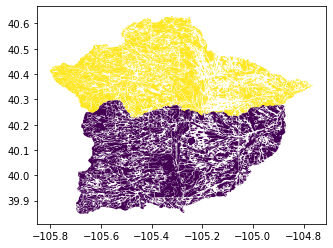

In [54]:
df_intersection.plot(column="HUC8")

In [55]:
df_final = df_intersection.groupby(['HUC8']).count()

In [56]:
print(df_final[['mapunitid']])

          mapunitid
HUC8               
10190005       2073
10190006       1979
